In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='Exited', ylabel='count'>

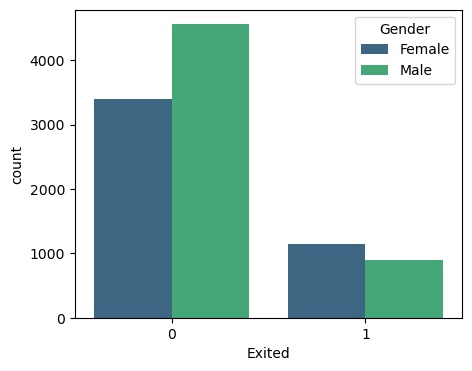

In [3]:
plt.figure(figsize=(5,4))
sns.countplot(x='Exited',data=df,palette='viridis',hue='Gender')

<Axes: xlabel='Exited', ylabel='count'>

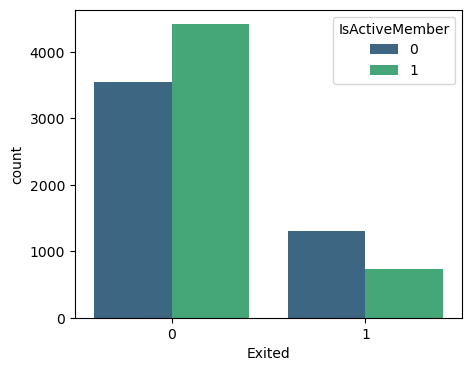

In [4]:
plt.figure(figsize=(5,4))
sns.countplot(x='Exited',data=df,palette='viridis',hue='IsActiveMember')

<Axes: xlabel='CreditScore', ylabel='Count'>

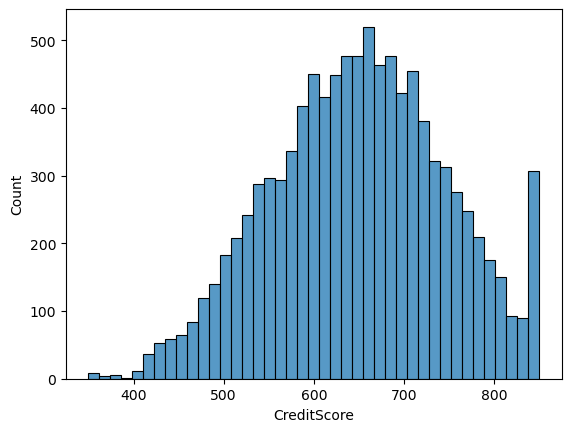

In [5]:
sns.histplot(df['CreditScore'],palette='viridis')

<Axes: xlabel='Geography', ylabel='count'>

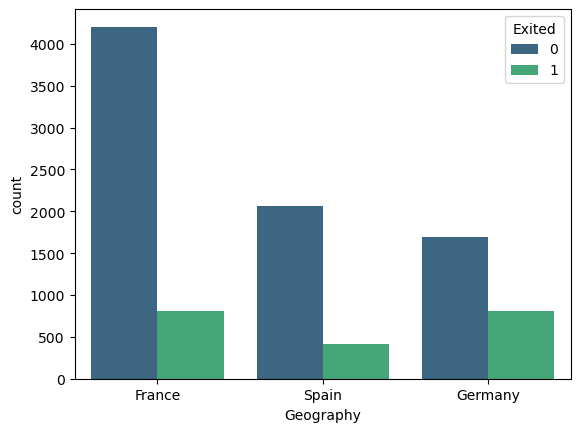

In [6]:
sns.countplot(x='Geography',data=df,hue='Exited',palette='viridis')

In [7]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [8]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [9]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
one_hot_encoder=OneHotEncoder()
geography_encoded=one_hot_encoder.fit_transform(df[['Geography']])

In [13]:
geography_encoded=geography_encoded.toarray()

In [14]:
geography_encoded

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [15]:
geography_df=pd.DataFrame(geography_encoded,columns=one_hot_encoder.get_feature_names_out(['Geography']))

In [16]:
geography_df.head()

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [17]:
df=pd.concat([df,geography_df],axis=1)

In [18]:
df.drop('Geography',axis=1,inplace=True)

In [19]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [40]:
#Splitting the data
from sklearn.model_selection import train_test_split

In [92]:
X=df.drop('Exited',axis=1)
y=df['Exited']
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=41
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=41)

In [94]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [56]:
#Buliding Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
from tensorflow.keras.optimizers import Adam
import datetime

In [58]:
X_train.shape

(7000, 12)

In [218]:
model=Sequential([
    Dense(128,activation='relu',input_shape=(X_train.shape[1],)),
    Dropout(0.25),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [220]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_69 (Dense)                │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,033 (47.00 KB)

 Trainable params: 12,033 (47.00 KB)

 Non-trainable params: 0 (0.00 B)

In [222]:
early_stopping=EarlyStopping(patience=3,monitor='val_loss',restore_best_weights=True)

In [224]:
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=30,callbacks=[early_stopping])

Epoch 1/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7867 - loss: 0.4933 - val_accuracy: 0.7930 - val_loss: 10563.3262
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8394 - loss: 0.3962 - val_accuracy: 0.7930 - val_loss: 8371.0332
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8516 - loss: 0.3692 - val_accuracy: 0.7930 - val_loss: 6253.8794
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8490 - loss: 0.3531 - val_accuracy: 0.6420 - val_loss: 4966.5889
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8533 - loss: 0.3573 - val_accuracy: 0.6860 - val_loss: 4153.3340
Epoch 6/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8553 - loss: 0.3474 - val_accuracy: 0.6400 - val_loss: 4999.8369
Epoch 7/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8581 - loss: 0.3483 - val_accuracy: 0.7930 - val_loss: 6352.9214
Epoch 8/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8578 - loss: 0.3

In [226]:
loss,acc=model.evaluate(X_test,y_test)
print(f"Model Accuarcy : {round(acc,2)}")
print(f"Model Loss : {round(loss,2)}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.8557 - loss: 0.3426
Model Accuarcy : 0.86
Model Loss : 0.33
